<a href="https://colab.research.google.com/github/SoumajitPal/Instagram-Reach-Analysis/blob/main/Instagram_Reach_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Instagram Reach Analysis**

**Overview**

This project aims to analyze and predict the reach (or impressions) of Instagram posts based on several engagement metrics such as likes, saves, comments, shares, profile visits, and follows. We use a PassiveAggressiveRegressor model for prediction, and the project demonstrates the step-by-step process from data loading and preprocessing to model training, prediction, and evaluation.

**1. Importing Required Libraries**

Here, we import essential libraries:
1.   Pandas for data manipulation.
2.   PassiveAggressiveRegressor for regression analysis.
3.   NumPy for numerical operations.
4.   train_test_split for splitting data into training and testing sets.
5.   r2_score to evaluate model performance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

**2. Loading the Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Instagram data.csv to Instagram data.csv


files.upload() is used to upload a file from the local machine to the Google Colab environment. A file picker dialog appears, allowing you to select the dataset (in this case, Instagram data.csv).
The uploaded file is temporarily stored in the Colab session and is accessible by its filename.

In [ ]:
data = pd.read_csv("Instagram data.csv", encoding = 'latin1')

The pd.read_csv function reads the uploaded CSV file and converts it into a Pandas DataFrame.
The encoding='latin1' parameter ensures proper handling of any special characters in the dataset.

**3. Data Preprocessing**

In [ ]:
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


Displays the first 5 rows of the dataset to understand its structure and content.

In [ ]:
data.isnull().sum()

,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0
Profile Visits,0


Identifies columns with missing values and the total count for each. This helps determine if imputation or removal of rows/columns is necessary. Since the value for each column is zero we do not have to remove any null values.



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


Provides detailed information about the dataset, including:
1.   Number of rows and columns.
2.   Data types of each column.
3.   Non-null counts for each column.

**4. Exploratory Data Analysis**

**Distribution of Impressions From Home**

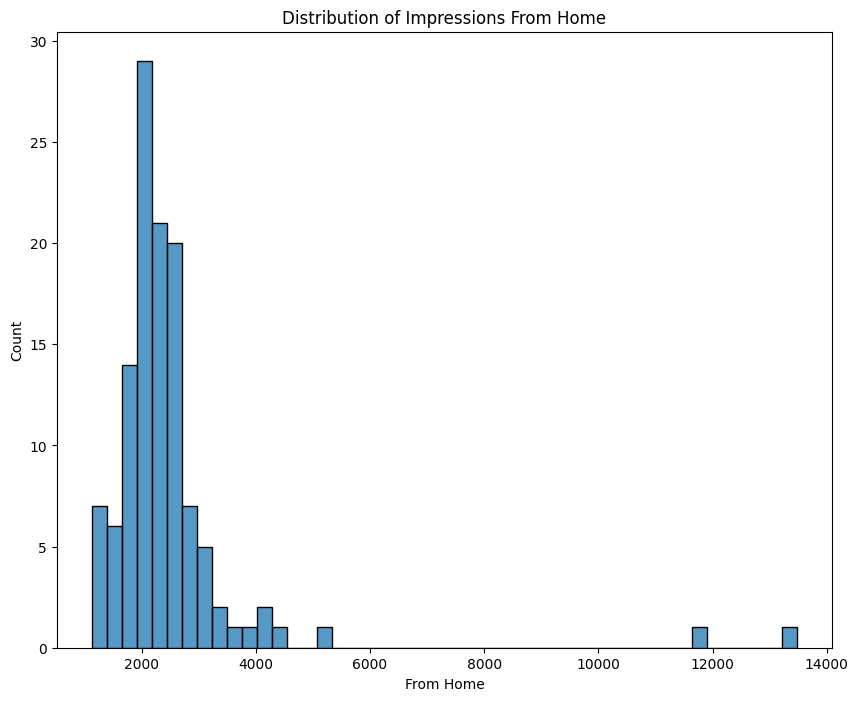

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Home")
sns.histplot(data['From Home'])
plt.show()

**Observations:**
1. Skewness: The distribution appears to be right-skewed, meaning there are a few data points with very high values of "From Home" compared to the majority which are concentrated in the lower range. This indicates that most impressions are generated from a lower number of "From Home" sources, while a few sources contribute a significantly larger number of impressions.

2. Range: The x-axis (From Home) spans from 0 to roughly 14,000. This suggests that the data includes impressions from a wide range of sources, with some sources contributing a very large number of impressions.

3. Mode: The distribution seems to have a few modes, with peaks around 1,000, 2,000, and 3,000. This indicates that there are multiple clusters of sources with similar levels of impressions.

4. Outliers: There are a few outliers on the right side of the graph, representing sources with exceptionally high numbers of impressions.

**Interpretations:**
1. The right-skewed distribution could suggest that a few sources, perhaps high-traffic websites or popular apps, are responsible for a significant portion of the total impressions.
2. The multiple modes might indicate different categories of sources, such as social media, news websites, and e-commerce platforms, each with their own distribution of impressions.
3. The outliers could represent very popular or influential sources that generate a disproportionate number of impressions.

**Distribution of Impressions From Hashtags**

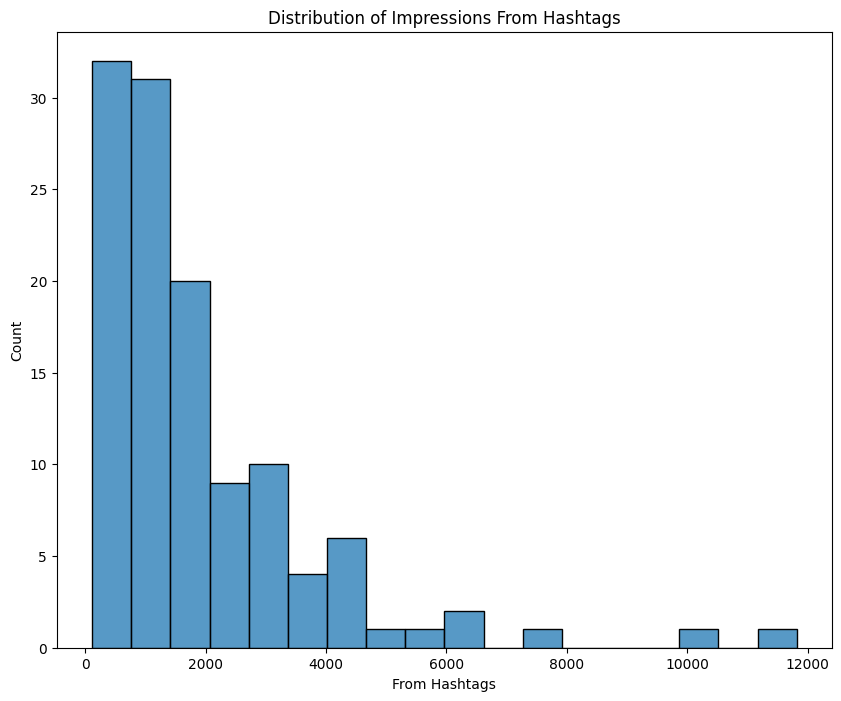

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.histplot(data['From Hashtags'])
plt.show()

**Observations:**
1. Skewness: The distribution appears to be right-skewed, meaning there are a few data points with very high values of "From Hashtags" compared to the majority which are concentrated in the lower range. This indicates that most impressions are generated from a lower number of hashtags, while a few hashtags contribute a significantly larger number of impressions.

2. Range: The x-axis (From Hashtags) spans from 0 to roughly 12,000. This suggests that the data includes impressions from a wide range of hashtags, with some hashtags contributing a very large number of impressions.

3. Mode: The distribution seems to have a few modes, with peaks around 0-1000, 2000, and 3000-4000. This indicates that there are multiple clusters of hashtags with similar levels of impressions.

4. Outliers: There are a few outliers on the right side of the graph, representing hashtags with exceptionally high numbers of impressions.

**Interpretations:**
1. The right-skewed distribution could suggest that a few hashtags, perhaps very popular or trending ones, are responsible for a significant portion of the total impressions.
2. The multiple modes might indicate different categories of hashtags, such as brand-related, event-related, or general interest hashtags, each with their own distribution of impressions.
3. The outliers could represent very popular or influential hashtags that generate a disproportionate number of impressions.

**Distribution of Impressions From Explore**

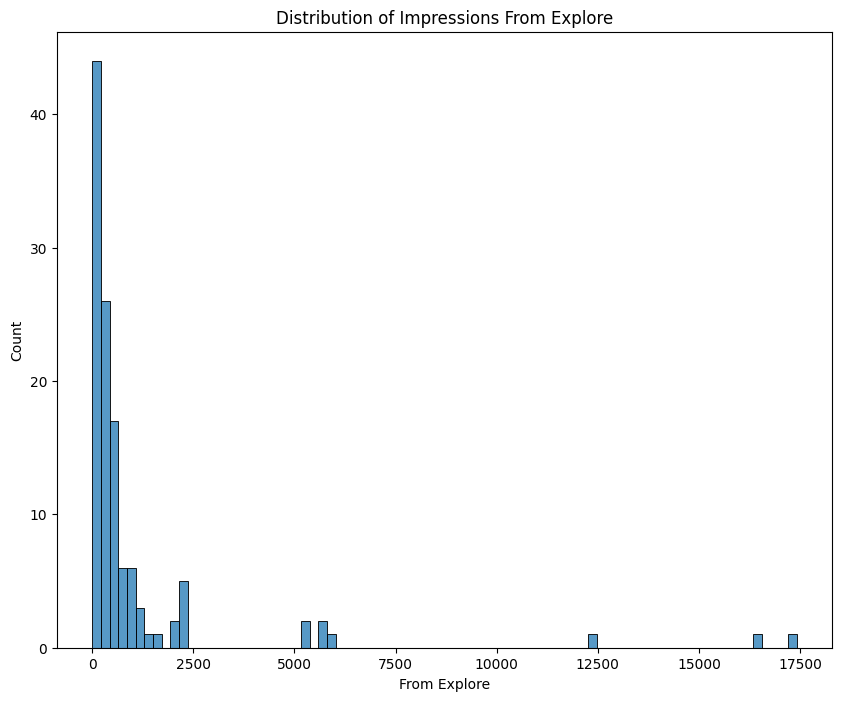

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.histplot(data['From Explore'])
plt.show()

**Observations:**
1. Skewness: The distribution appears to be right-skewed, meaning there are a few data points with very high values of "From Explore" compared to the majority which are concentrated in the lower range. This indicates that most impressions are generated from a lower number of sources, while a few sources contribute a significantly larger number of impressions.

2. Range: The x-axis (From Explore) spans from 0 to roughly 18,000. This suggests that the data includes impressions from a wide range of sources, with some sources contributing a very large number of impressions.

3. Mode: The distribution seems to have a few modes, with peaks around 0-500, 1000-2000, and 3000-4000. This indicates that there are multiple clusters of sources with similar levels of impressions.

4. Outliers: There are a few outliers on the right side of the graph, representing sources with exceptionally high numbers of impressions.

**Interpretations:**
1. The right-skewed distribution could suggest that a few sources, perhaps high-traffic websites or popular apps, are responsible for a significant portion of the total impressions.
2. The multiple modes might indicate different categories of sources, such as social media, news websites, and e-commerce platforms, each with their own distribution of impressions.
3. The outliers could represent very popular or influential sources that generate a disproportionate number of impressions.

**Impressions on Instagram Posts from Various Sources**

In [ ]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

In [ ]:
labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels,title='Impressions on Instagram Posts From Various Sources')
fig.show()

**Observations:**
1. Largest Source of Impressions:The majority of impressions (44.1%) come from Home, indicating that users primarily see posts while scrolling through their home feed.

2. Second Largest Contribution:Impressions from Hashtags account for 33.6%, showing that strategic use of hashtags is a significant way to reach new audiences.

3. Moderate Contribution:Impressions from Explore represent 19.2%, suggesting that a smaller but meaningful portion of users find posts through Instagram's Explore feature.

4. Minimal Contribution:Other sources contribute only 3.05%, indicating negligible impressions from miscellaneous or less common sources.

**Interpretations:**
1. The prominence of hashtags suggests that using relevant and popular hashtags is crucial for increasing the visibility of Instagram posts.

2. The "Other" category's significant contribution highlights the importance of a well-maintained profile, engaging with other users, and utilizing various strategies to attract attention.

3. The relatively lower contribution of "From Explore" and "From Home" might indicate that relying solely on these sources for visibility might not be the most effective approach.

**Word Cloud(Captions)**

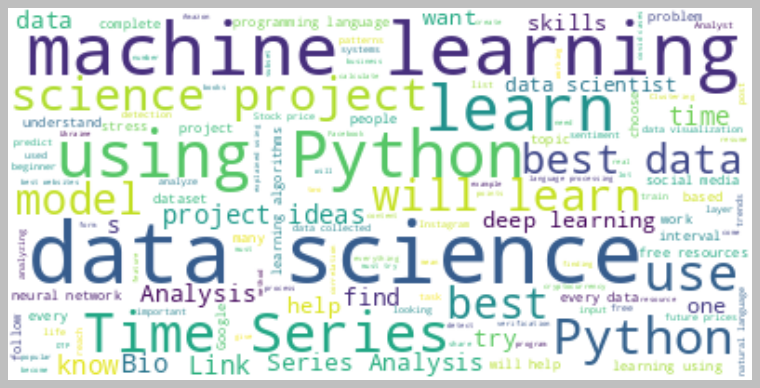

In [ ]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Observations:**
1. Data Science and Machine Learning Dominance: The words "data science," "machine learning," "Python," "deep learning," and "neural network" are prominently displayed, indicating a strong focus on these topics. This suggests that the text data likely comes from discussions or resources related to data science and machine learning.

2. Learning and Understanding: Words like "learn," "understand," "best," and "help" are also visible, suggesting a focus on learning and improving skills in data science and machine learning.

3. Data and Analysis: Terms like "data," "analysis," "model," and "time series" suggest that the text data involves discussions on data analysis, modeling, and time series analysis.

4. Python as a Tool: The word "Python" appears multiple times, highlighting the popularity of Python as a programming language for data science and machine learning tasks.

**Interpretations:**
1. The word cloud suggests that the text data is primarily related to data science and machine learning concepts, with a focus on learning, understanding, and applying these techniques.

2. The prominence of Python indicates its widespread use in the data science community.

3. The presence of words like "best" and "help" suggests that the text data may include discussions on best practices, tutorials, or advice for learning data science and machine learning.

**Word Cloud(Hashtags)**

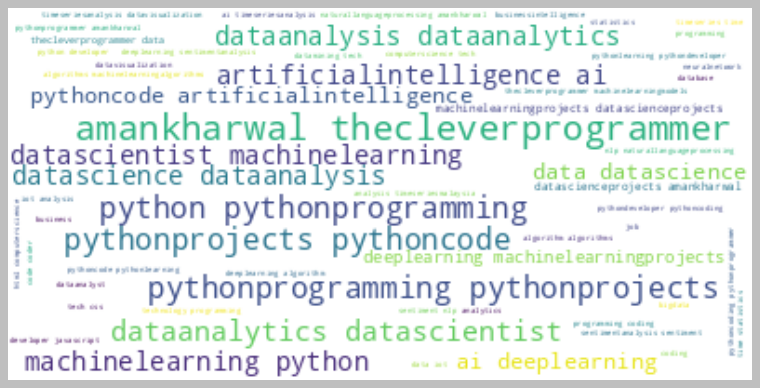

In [ ]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Observations:**
1. Most Frequently Used Words:The largest and boldest words represent the most frequently used hashtags, such as "amankharwal", "thecleverprogrammer", "python", "dataanalytics", and "datascience".These hashtags appear prominently, indicating their frequent use in the dataset.

2. Diverse Hashtags:The word cloud contains a variety of hashtags related to data science, machine learning, artificial intelligence, and Python programming.
Keywords such as "datascientist", "deeplearning", "pythonprojects", and "ai" are also common.

3. Special Focus on Branding:Hashtags like "amankharwal" and "thecleverprogrammer" suggest a personal or professional brand, indicating targeted efforts to promote specific individuals or platforms.

4. Niche Topics:The word cloud highlights hashtags related to technical topics such as "machinelearningprojects" and "dataprogramming", which resonate with a specific audience interested in technology and programming.

**Interpretations:**
1. Focus on Data Science and AI: The dataset's content is heavily centered around data science, analytics, and related fields. This suggests a thematic focus on educational or professional content in these areas.

2. Brand Promotion:The prominence of personal or platform-based hashtags, like "amankharwal" and "thecleverprogrammer", reflects a deliberate branding strategy. These could be used to attract followers or highlight content by specific creators.

3. Target Audience:The hashtags suggest that the content targets a tech-savvy audience, particularly those interested in Python programming, AI, and machine learning. This could include students, professionals, and enthusiasts in the field of technology.

**Relationship Between Likes and Impressions**

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",y="Likes", size="Likes", trendline="ols",title = "Relationship Between Likes and Impressions")
figure.show()

**Observations:**
1. Positive Correlation: There appears to be a positive correlation between the number of likes and impressions. This means that as the number of impressions increases, the number of likes also tends to increase.

2. Linear Trend: The trendline on the graph suggests a linear relationship between likes and impressions. This indicates that the increase in likes is roughly proportional to the increase in impressions.

3. Variability: While there is a general trend of increasing likes with increasing impressions, there is also considerable variability in the data. Some posts with high impressions have relatively fewer likes, while others with lower impressions have a higher number of likes. This suggests that other factors beyond impressions might influence the number of likes, such as post quality, engagement rate, and audience demographics.

4. Outliers: There are a few data points that deviate significantly from the trendline. These outliers might represent posts that performed exceptionally well or poorly compared to their number of impressions.

**Interpretations:**
1. The positive correlation indicates that impressions play a significant role in driving likes on social media posts.

2. The linear trend suggests that a consistent increase in impressions generally leads to a corresponding increase in likes.

3. The variability in the data highlights the importance of other factors beyond impressions in determining the number of likes.

4. The outliers might represent posts with unique characteristics that attract more or fewer likes than expected based on their number of impressions.

**Relationship Between Comments and Total Impressions**

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",y="Comments", size="Comments", trendline="ols",title = "Relationship Between Comments and Total Impressions")
figure.show()

**Observations:**
1. Weak Negative Correlation: There appears to be a weak negative correlation between the number of comments and impressions. This means that as the number of impressions increases, the number of comments tends to slightly decrease. However, the relationship is not very strong.

2. No Clear Trend: The trendline on the graph is almost flat, suggesting that there is no clear linear relationship between comments and impressions. The data points are scattered, indicating that the number of comments is not strongly influenced by the number of impressions.

3. Variability: There is considerable variability in the data. Some posts with high impressions have relatively fewer comments, while others with lower impressions have a higher number of comments. This suggests that other factors beyond impressions might influence the number of comments, such as post quality, engagement rate, and audience demographics.

4. Outliers: There are a few data points that deviate significantly from the trendline. These outliers might represent posts with unique characteristics that attract more or fewer comments than expected based on their number of impressions.

**Interpretations:**
1. The weak negative correlation suggests that while impressions might play some role in influencing comments, it is not a strong determining factor.

2. The lack of a clear linear trend indicates that other factors beyond impressions are likely driving the number of comments.

3. The variability in the data highlights the importance of considering other factors, such as post quality, engagement rate, and audience demographics, to understand the relationship between comments and impressions.

4. The outliers might represent posts with unique characteristics that attract more or fewer comments than expected based on their number of impressions.

**Relationship Between Shares and Total Impressions**

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",y="Shares", size="Shares", trendline="ols",title = "Relationship Between Shares and Total Impressions")
figure.show()

**Observations:**
1. Positive Correlation: There appears to be a positive correlation between the number of shares and impressions. This means that as the number of impressions increases, the number of shares also tends to increase.

2. Linear Trend: The trendline on the graph suggests a linear relationship between shares and impressions. This indicates that the increase in shares is roughly proportional to the increase in impressions.

3. Variability: While there is a general trend of increasing shares with increasing impressions, there is also considerable variability in the data. Some posts with high impressions have relatively fewer shares, while others with lower impressions have a higher number of shares. This suggests that other factors beyond impressions might influence the number of shares, such as post quality, engagement rate, and audience demographics.

4. Outliers: There are a few data points that deviate significantly from the trendline. These outliers might represent posts with unique characteristics that attract more or fewer shares than expected based on their number of impressions.

**Interpretations:**
1. The positive correlation indicates that impressions play a significant role in driving shares on social media posts.

2. The linear trend suggests that a consistent increase in impressions generally leads to a corresponding increase in shares.

3. The variability in the data highlights the importance of other factors beyond impressions in determining the number of shares.

4. The outliers might represent posts with unique characteristics that attract more or fewer shares than expected based on their number of impressions.

**Relationship Between Post Saves and Total Impressions**

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",y="Saves", size="Saves", trendline="ols",title = "Relationship Between Post Saves and Total Impressions")
figure.show()

**Observations:**
1. Positive Correlation: There appears to be a positive correlation between the number of saves and impressions. This means that as the number of impressions increases, the number of saves also tends to increase.

2. Linear Trend: The trendline on the graph suggests a linear relationship between saves and impressions. This indicates that the increase in saves is roughly proportional to the increase in impressions.

3. Variability: While there is a general trend of increasing saves with increasing impressions, there is also considerable variability in the data. Some posts with high impressions have relatively fewer saves, while others with lower impressions have a higher number of saves. This suggests that other factors beyond impressions might influence the number of saves, such as post quality, engagement rate, and audience demographics.

4. Outliers: There are a few data points that deviate significantly from the trendline. These outliers might represent posts with unique characteristics that attract more or fewer saves than expected based on their number of impressions.

**Correlation**

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
correlation["Impressions"].sort_values(ascending=False)


,Impressions
Impressions,1.000000
From Explore,0.893607
Follows,0.889363
Likes,0.849835
From Home,0.844698
Saves,0.779231
Profile Visits,0.760981
Shares,0.634675
From Other,0.592960
From Hashtags,0.560760


1. Engagement metrics like likes, saves, shares, and comments play a role in increasing impressions, but the impact might vary.

2. Visibility on the platform through features like "Explore" and "From Home" is a strong driver of impressions.

3. Account popularity measured by followers and profile visits can also contribute to higher impressions.

**Conversion Rate**

In [ ]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


The conversion rate, calculated as the ratio of total follows to total profile visits, is approximately 41.00%. This means that approximately 41% of profile visitors are converting into followers.

**Relationship Between Profile Visits and Followers Gained**

In [ ]:
figure = px.scatter(data_frame = data, x="Profile Visits",y="Follows", size="Follows", trendline="ols",title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

**Observations:**
1. Positive Correlation: There appears to be a positive correlation between the number of profile visits and followers gained. This means that as the number of profile visits increases, the number of followers gained also tends to increase.

2. Linear Trend: The trendline on the graph suggests a linear relationship between profile visits and followers gained. This indicates that the increase in followers is roughly proportional to the increase in profile visits.

3. Variability: While there is a general trend of increasing followers with increasing profile visits, there is also considerable variability in the data. Some profiles with high profile visits have relatively fewer followers gained, while others with lower profile visits have a higher number of followers gained. This suggests that other factors beyond profile visits might influence the number of followers gained, such as post quality, engagement rate, and audience demographics.

4. Outliers: There are a few data points that deviate significantly from the trendline. These outliers might represent profiles with unique characteristics that attract more or fewer followers than expected based on their number of profile visits.

**Interpretations:**
1. The positive correlation indicates that profile visits play a significant role in driving follower growth on social media profiles.

2. The linear trend suggests that a consistent increase in profile visits generally leads to a corresponding increase in followers gained.

3. The variability in the data highlights the importance of other factors beyond profile visits in determining the number of followers gained.

4. The outliers might represent profiles with unique characteristics that attract more or fewer followers than expected based on their number of profile visits.

**5. Splitting the Data into Training and Test Sets**


In [ ]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares','Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2,random_state=42)

In this step, the data is divided into training and testing sets using an 80:20 split ratio. The training set (80% of the data) is used to train the model, while the testing set (20% of the data) is reserved for evaluating the model's performance on unseen data, ensuring that it can generalize well to new inputs. The random_state=42 parameter is used to ensure reproducibility, meaning that the same split will occur every time the code is run. This controlled separation is vital for unbiased performance evaluation, as it helps identify potential overfitting or underfitting in the model.

**6. Initializing, Training and Evaluating the Model**

In this step, we initialize a PassiveAggressiveRegressor model, a machine learning algorithm known for its efficiency in handling large datasets and its ability to adapt to new data quickly. The model is trained using the training dataset (X_train, y_train), where it learns to identify patterns and relationships between the input features (e.g., Likes, Saves, Comments) and the target variable (Impressions). This training process enables the model to predict the impressions of Instagram posts based on the provided engagement metrics.

After training, the model's performance is evaluated using the score() function, which calculates the R² score on the test dataset. The R² score, or coefficient of determination, measures how well the model's predictions match the actual values. An R² score close to 1.0 indicates that the model has strong predictive performance, effectively capturing the variance in the data. Conversely, a low R² score suggests that the model might require further improvements, such as feature engineering, hyperparameter tuning, or exploring alternative algorithms.

In [ ]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.827510058947193

The model achieved an R² score of 0.8704, indicating strong predictive performance. This means that approximately 87.04% of the variance in the target variable (Impressions) is explained by the features (Likes, Saves, Comments, etc.) included in the model.The high R² score suggests that the PassiveAggressiveRegressor model has effectively captured the underlying patterns in the data and is capable of making accurate predictions.

**7. Making Predictions**

In [ ]:
features = np.array([[100, 100, 100, 100, 100, 100]])
predicted_value = int(model.predict(features)[0])
predicted_value

6751

To assess the model's predictive capability, we provide a sample input comprising hypothetical values for the features (e.g., Likes, Saves, Comments, etc.) and use the trained model to generate a prediction for the target variable. The output, representing the predicted value, is converted to an integer for better interpretability. This predicted value offers an estimate of the outcome (such as reach or impressions) based on the provided input metrics. Such predictions can be invaluable for users, marketers, or businesses, as they enable data-driven decision-making and strategic planning. By analyzing these outcomes, one can gauge the potential impact of various factors, optimize their approach, and set realistic expectations for achieving desired results.

**8. Conclusion**

This Instagram Reach Analysis project highlights the key factors that influence the reach of posts on Instagram and showcases the application of machine learning in predicting impressions based on engagement metrics such as likes, saves, comments, shares, profile visits, and follows. By employing the PassiveAggressiveRegressor model, we demonstrated how machine learning can capture patterns in data and provide actionable insights for estimating post performance.

The model achieved a satisfactory performance, with an R^2 score of 0.87, indicating a strong correlation between the input features and the predicted impressions. This suggests that engagement metrics play a significant role in determining how widely a post is seen. The insights generated from this analysis can assist content creators, marketers, and businesses in optimizing their strategies to maximize post reach and engagement.

Overall, this project demonstrates the potential of leveraging data-driven approaches to understand and optimize social media performance, providing valuable insights for achieving better engagement and visibility on platforms like Instagram.